<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'>Predict Insurance Claim Decision in Next 6 Months using Machine Learning</h1>
</div>

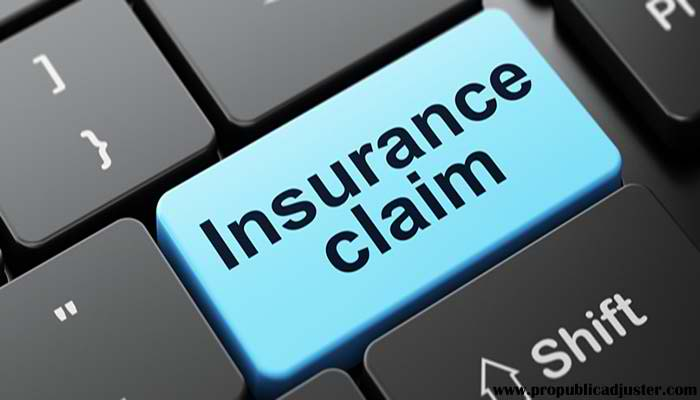

**Author:-** Aniket B. Barphe
    
**LinkedIn Profile:-** https://www.linkedin.com/in/aniiketbarphe/
        
**Platform:-** Dataverse Hack (Analytics Vidhya-13 to 14 Nov 2022)
    
**Problem Statement:-** Build a machine learning-based approach to predict the Insurance Claim Decision in next 6 Months

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Setup Environment</h2>
</div>

- Import the libraries
- Set the options for better visulization

In [1]:
# Data manipulation
import numpy as np
import pandas as pd
import os

# Data Visualazation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Machine learning
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from lightgbm import LGBMModel,LGBMClassifier
import catboost as cb
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Model Evaluations
import sklearn as sk
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss

# print module versions for reproducibility
print('CatBoost version {}'.format(cb.__version__))
print('NumPy version {}'.format(np.__version__))
print('Pandas version {}'.format(pd.__version__))
print('seaborn version {}'.format(sns.__version__))
print('sklearn version {}'.format(sk.__version__))
print('xgboost version {}'.format(xgb.__version__))
print('lightgbm version {}'.format(lgb.__version__))
print('scikit-learn version {}'.format(sk.__version__))

CatBoost version 1.1.1
NumPy version 1.20.1
Pandas version 1.2.4
seaborn version 0.11.1
sklearn version 0.24.1
xgboost version 1.7.1
lightgbm version 3.3.3
scikit-learn version 0.24.1


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Load Data</h2>
</div>

- Read & Load "Train" data in "train" Variable 
- Read & Load "Test" data in "test" Variable 
- Read & Load "Submission" data in "submission" Variable 

In [2]:
train = pd.read_csv(r'C:\Users\abarphe\Favorites\AV\Dataverse\train_qWM28Yl.csv')
test = pd.read_csv(r'C:\Users\abarphe\Favorites\AV\Dataverse\test_zo1G9sv.csv')
submission = pd.read_csv(r'C:\Users\abarphe\Favorites\AV\Dataverse\sample_submission_KvRh9Sx.csv')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Overview</h2>
</div>

- Get the basic information of the data
- Check Top 5 entries of the data
- Check Bottom 5 entries of the data
- Statistical Insight of Train Dataset including Categorical Variable
- Statistical Insight of Test Dataset including Categorical Variable
- Check Null Entries in Train Dataset 
- Check Null Entries in Test Dataset 


In [3]:
print("Data Types in Train Data:-\n")
print(train.info(),'\n')

print("Shape of Train Data:-\n")
print(train.shape,'\n')

print('-------------'*9)

print("\nData Types in Test Data:-\n")
print(test.info(),'\n')

print("\nShape of Test Data:-\n")
print(test.shape,'\n')

print('-------------'*9)

print("\nData Types in Submission Data:-\n")
print(submission.info(),'\n')

print("\nShape of Submission Data:-\n")
print(submission.shape,'\n')

print('-------------'*9)

Data Types in Train Data:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592

In [4]:
print("About Train Data:-\n")
print(train.head(),'\n')
print('-------------'*9)

print("\nAbout Test Data:-\n")
print(test.head(),'\n')
print('-------------'*9)

print("\nAbout Submission Data:-\n")
print(submission.head(),'\n')
print('-------------'*9)

About Train Data:-

  policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type  ... is_brake_assist  \
0                4990     1       A    M1       CNG  ...              No   
1               27003     1       A    M1       CNG  ...              No   
2                4076     1       A    M1       CNG  ...              No   
3               21622     1      C1    M2    Petrol  ...             Yes   
4               34738     2       A    M3    Petrol  ...              No   

  is_power_door_locks is_central_locking  is_power_steering  \
0  

In [5]:
print("About Train Data:-\n")
print(train.tail(),'\n')
print('-------------'*9)

print("\nAbout Test Data:-\n")
print(test.tail(),'\n')
print('-------------'*9)

print("\nAbout Submission Data:-\n")
print(submission.tail(),'\n')
print('-------------'*9)

About Train Data:-

      policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
58587   ID58588       0.355089        0.13             0.644231           C8   
58588   ID58589       1.199642        0.02             0.519231          C14   
58589   ID58590       1.162273        0.05             0.451923           C5   
58590   ID58591       1.236307        0.14             0.557692           C8   
58591   ID58592       0.124429        0.02             0.442308           C8   

       population_density  make segment model fuel_type  ... is_brake_assist  \
58587                8794     2       A    M3    Petrol  ...              No   
58588                7788     1       A    M1       CNG  ...              No   
58589               34738     1       A    M1       CNG  ...              No   
58590                8794     1      B2    M6    Petrol  ...             Yes   
58591                8794     3      C2    M4    Diesel  ...             Yes   

      is_power_doo

In [6]:
train.describe(include='all')  
# Below Line will provide Statistical Insight of data for Numerical Variable Only
# train.describe()  

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
count,58592,58592.000000,58592.000000,58592.000000,58592,58592.000000,58592.000000,58592,58592,58592,...,58592,58592,58592,58592,58592,58592,58592,58592,58592.000000,58592.000000
unique,58592,NaN,NaN,NaN,22,NaN,NaN,6,11,3,...,2,2,2,2,2,2,2,2,NaN,NaN
top,ID10518,NaN,NaN,NaN,C8,NaN,NaN,B2,M1,Petrol,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,NaN,NaN
freq,1,NaN,NaN,NaN,13654,NaN,NaN,18314,14948,20532,...,32177,42435,42435,57383,34291,36309,42435,58229,NaN,NaN
mean,NaN,0.611246,0.069424,0.469420,NaN,18826.858667,1.763722,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.759950,0.063968
std,NaN,0.414156,0.056721,0.122886,NaN,17660.174792,1.136988,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.389576,0.244698
min,NaN,0.002735,0.000000,0.288462,NaN,290.000000,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,0.210250,0.020000,0.365385,NaN,6112.000000,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,NaN,0.573792,0.060000,0.451923,NaN,8794.000000,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000
75%,NaN,1.039104,0.110000,0.548077,NaN,27003.000000,3.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.000000


In [7]:
test.describe(include='all')
# Below Line will provide Statistical Insight of data for Numerical Variable Only
# test.describe()  

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
count,39063,39063.000000,39063.000000,39063.000000,39063,39063.000000,39063.000000,39063,39063,39063,...,39063,39063,39063,39063,39063,39063,39063,39063,39063,39063.000000
unique,39063,NaN,NaN,NaN,22,NaN,NaN,6,11,3,...,2,2,2,2,2,2,2,2,2,NaN
top,ID62338,NaN,NaN,NaN,C8,NaN,NaN,B2,M1,CNG,...,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,NaN
freq,1,NaN,NaN,NaN,9161,NaN,NaN,12049,10040,13659,...,25412,21308,28298,28298,38338,22702,24312,28298,38827,NaN
mean,NaN,0.611304,0.069635,0.469087,NaN,18816.232496,1.763382,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.759235
std,NaN,0.415005,0.056854,0.122072,NaN,17651.942351,1.134112,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386689
min,NaN,0.002745,0.000000,0.288462,NaN,290.000000,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,0.208958,0.020000,0.375000,NaN,6112.000000,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,0.574078,0.060000,0.451923,NaN,8794.000000,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
75%,NaN,1.040936,0.110000,0.548077,NaN,27003.000000,3.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000


In [8]:
print("Checking Null entries & their Percentage in Train Data:-\n\n")
missing_val_train=pd.DataFrame(zip(train.isnull().sum(),train.isnull().sum()*100/len(train))
                               ,columns=['Missing Values','Percentage Missing Values'],index=train.columns)
missing_val_train

Checking Null entries & their Percentage in Train Data:-




,Missing Values,Percentage Missing Values
policy_id,0,0.0
policy_tenure,0,0.0
age_of_car,0,0.0
age_of_policyholder,0,0.0
area_cluster,0,0.0
population_density,0,0.0
make,0,0.0
segment,0,0.0
model,0,0.0
fuel_type,0,0.0


In [9]:
print("Checking Null entries & their Percentage in Test Data:-\n\n")
missing_val_test=pd.DataFrame(zip(test.isnull().sum(),test.isnull().sum()*100/len(test))
                              ,columns=['Missing Values','Percentage Missing Values'],index=test.columns)
missing_val_test

Checking Null entries & their Percentage in Test Data:-




,Missing Values,Percentage Missing Values
policy_id,0,0.0
policy_tenure,0,0.0
age_of_car,0,0.0
age_of_policyholder,0,0.0
area_cluster,0,0.0
population_density,0,0.0
make,0,0.0
segment,0,0.0
model,0,0.0
fuel_type,0,0.0


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Visualization</h2>
</div>

- Understand more about "Train" Data


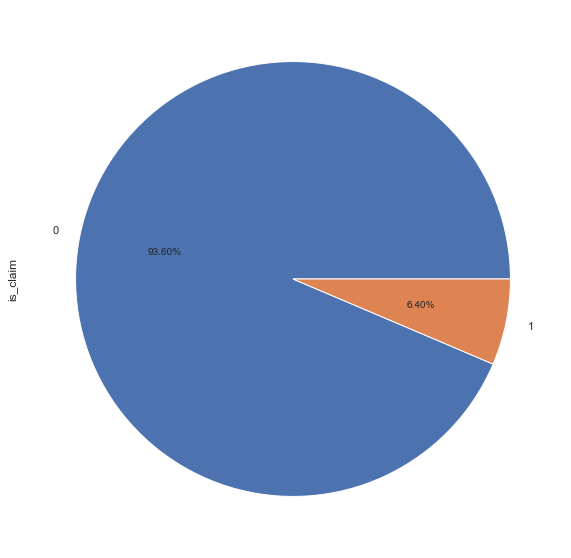

In [10]:
# Check the distribution of Target variable to see if it's a case of unbalanced class
plt.figure(figsize=(15,10))
train.is_claim.value_counts().plot.pie(autopct="%0.2f%%");

0    54844
1     3748
Name: is_claim, dtype: int64


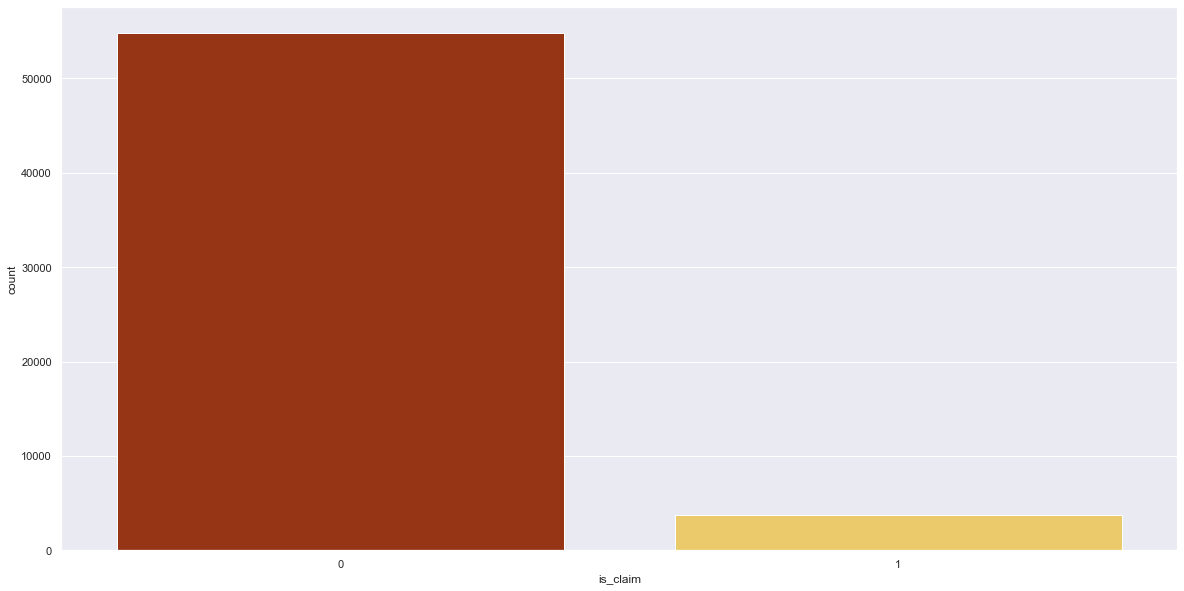

In [11]:
plt.figure(figsize=(20,10))
sns.countplot(x=train["is_claim"], palette = 'afmhot');
print(train["is_claim"].value_counts())

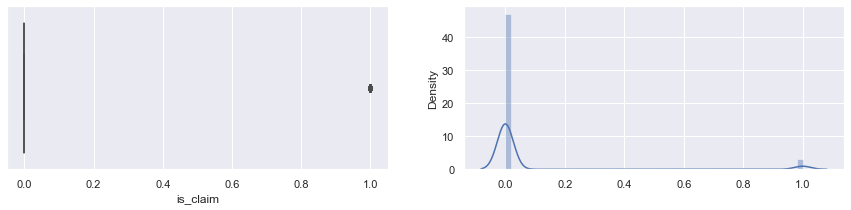

In [12]:
# Check distribution of Target Variable
# setup figure size
plt.subplots(figsize=(15,3))

# boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='is_claim', data=train);

# distplot
plt.subplot(1, 2, 2)
sns.distplot(x=train['is_claim']);

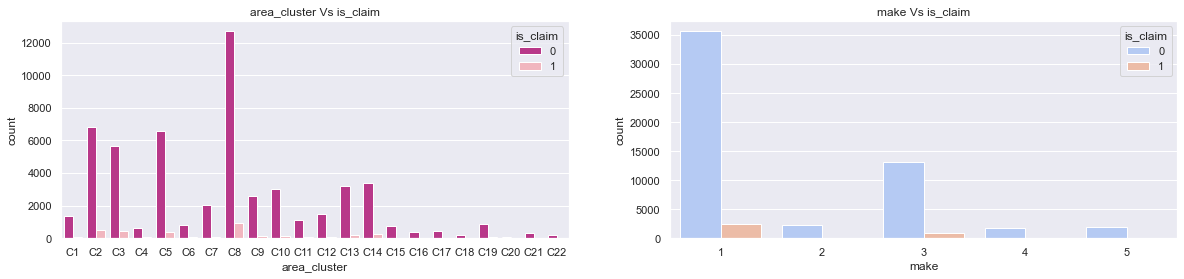

In [13]:
plt.figure(figsize=(20,4))
plt.subplot(121)
plt.title('area_cluster Vs is_claim')
sns.countplot(x='area_cluster',data=train,hue='is_claim', palette = 'RdPu_r');
plt.subplot(122)
plt.title('make Vs is_claim')
sns.countplot(x='make',data=train,hue='is_claim', palette = 'coolwarm');

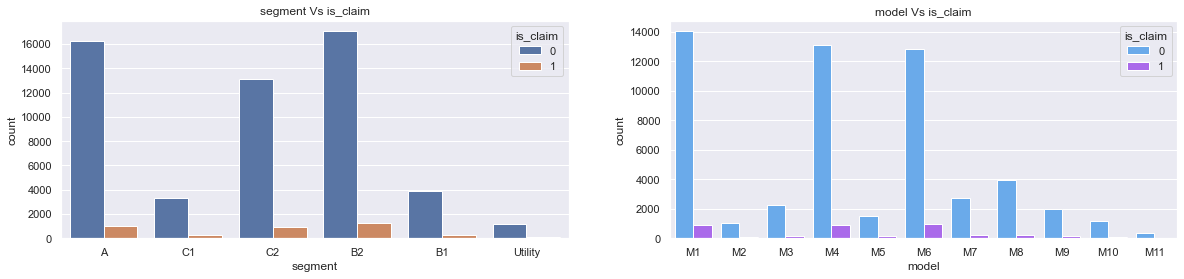

In [14]:
plt.figure(figsize=(20,4))
plt.subplot(121)
plt.title('segment Vs is_claim')
sns.countplot(x='segment',data=train,hue='is_claim');
plt.subplot(122)
plt.title('model Vs is_claim')
sns.countplot(x='model',data=train,hue='is_claim', palette = 'cool');

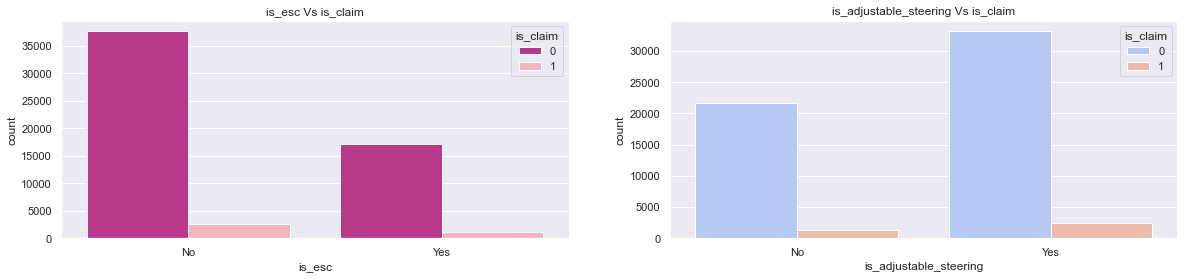

In [15]:
plt.figure(figsize=(20,4))
plt.subplot(121)
plt.title('is_esc Vs is_claim')
sns.countplot(x='is_esc',data=train,hue='is_claim', palette = 'RdPu_r');
plt.subplot(122)
plt.title('is_adjustable_steering Vs is_claim')
sns.countplot(x='is_adjustable_steering',data=train,hue='is_claim', palette = 'coolwarm');

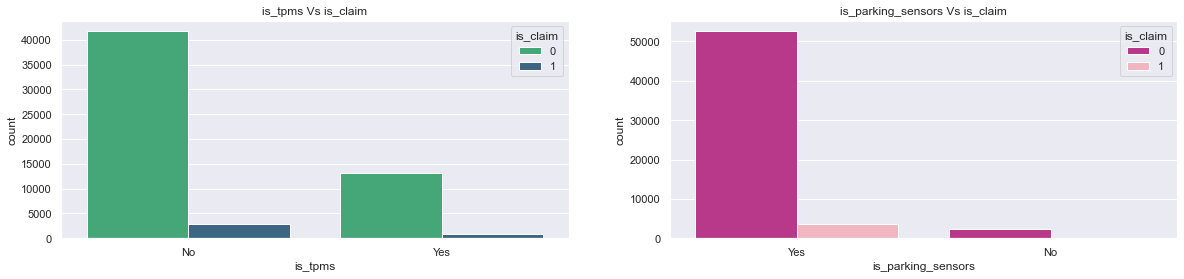

In [16]:
plt.figure(figsize=(20,4))
plt.subplot(121)
plt.title('is_tpms Vs is_claim')
sns.countplot(x='is_tpms',data=train,hue='is_claim', palette = 'viridis_r');
plt.subplot(122)
plt.title('is_parking_sensors Vs is_claim')
sns.countplot(x='is_parking_sensors',data=train,hue='is_claim', palette = 'RdPu_r');

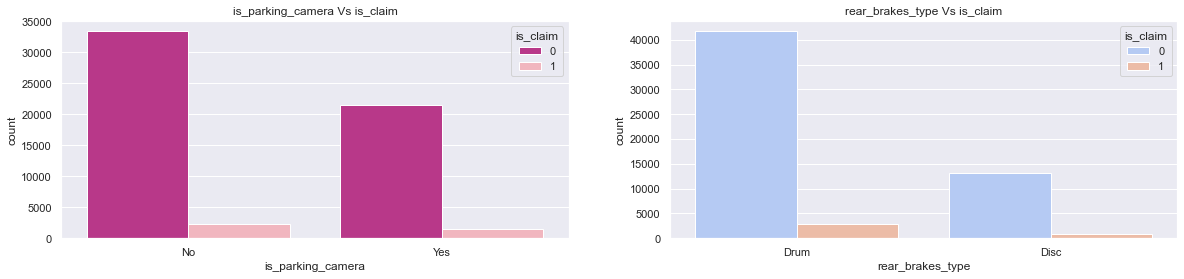

In [17]:
plt.figure(figsize=(20,4))
plt.subplot(121)
plt.title('is_parking_camera Vs is_claim')
sns.countplot(x='is_parking_camera',data=train,hue='is_claim', palette = 'RdPu_r');
plt.subplot(122)
plt.title('rear_brakes_type Vs is_claim')
sns.countplot(x='rear_brakes_type',data=train,hue='is_claim', palette = 'coolwarm');

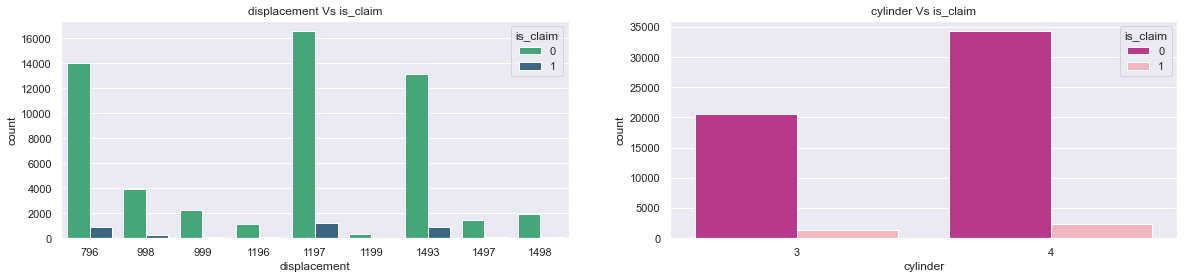

In [18]:
plt.figure(figsize=(20,4))
plt.subplot(121)
plt.title('displacement Vs is_claim')
sns.countplot(x='displacement',data=train,hue='is_claim', palette = 'viridis_r');
plt.subplot(122)
plt.title('cylinder Vs is_claim')
sns.countplot(x='cylinder',data=train,hue='is_claim', palette = 'RdPu_r');

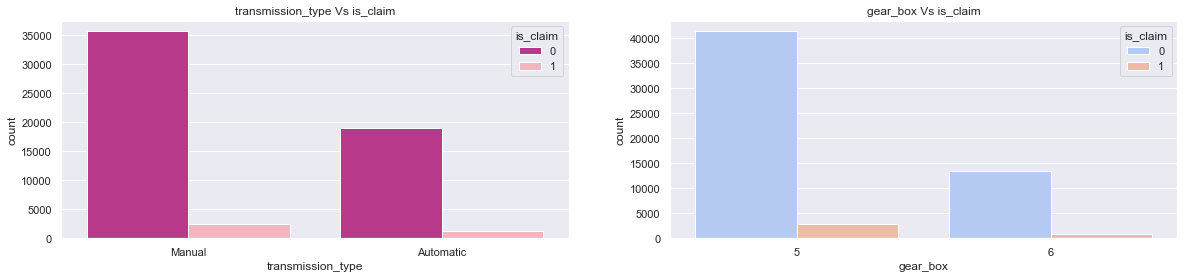

In [19]:
plt.figure(figsize=(20,4))
plt.subplot(121)
plt.title('transmission_type Vs is_claim')
sns.countplot(x='transmission_type',data=train,hue='is_claim', palette = 'RdPu_r');
plt.subplot(122)
plt.title('gear_box Vs is_claim')
sns.countplot(x='gear_box',data=train,hue='is_claim', palette = 'coolwarm');

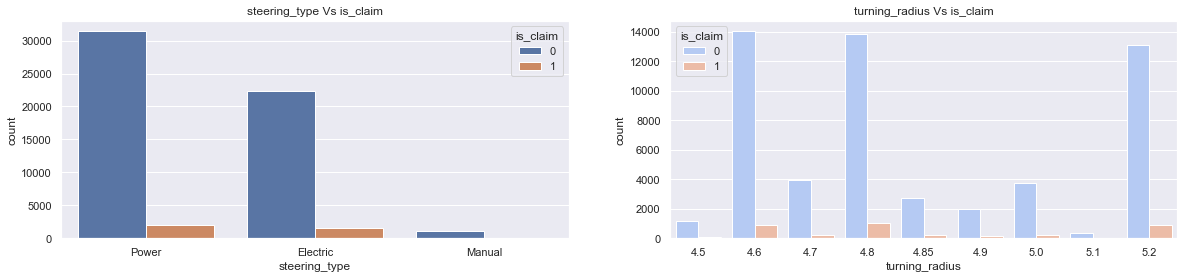

In [20]:
plt.figure(figsize=(20,4))
plt.subplot(121)
plt.title('steering_type Vs is_claim')
sns.countplot(x='steering_type',data=train,hue='is_claim');
plt.subplot(122)
plt.title('turning_radius Vs is_claim')
sns.countplot(x='turning_radius',data=train,hue='is_claim', palette = 'coolwarm');

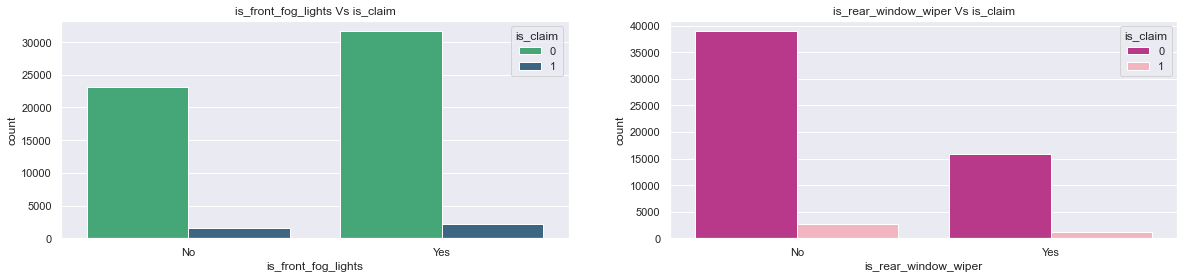

In [21]:
plt.figure(figsize=(20,4))
plt.subplot(121)
plt.title('is_front_fog_lights Vs is_claim')
sns.countplot(x='is_front_fog_lights',data=train,hue='is_claim', palette = 'viridis_r');
plt.subplot(122)
plt.title('is_rear_window_wiper Vs is_claim')
sns.countplot(x='is_rear_window_wiper',data=train,hue='is_claim', palette = 'RdPu_r');

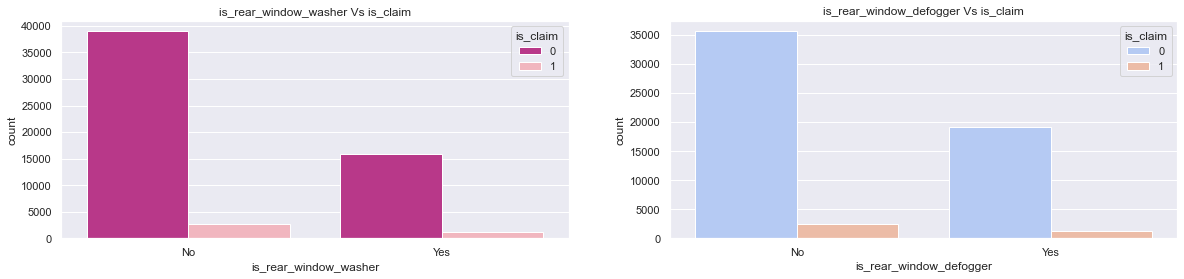

In [22]:
plt.figure(figsize=(20,4))
plt.subplot(121)
plt.title('is_rear_window_washer Vs is_claim')
sns.countplot(x='is_rear_window_washer',data=train,hue='is_claim', palette = 'RdPu_r');
plt.subplot(122)
plt.title('is_rear_window_defogger Vs is_claim')
sns.countplot(x='is_rear_window_defogger',data=train,hue='is_claim', palette = 'coolwarm');

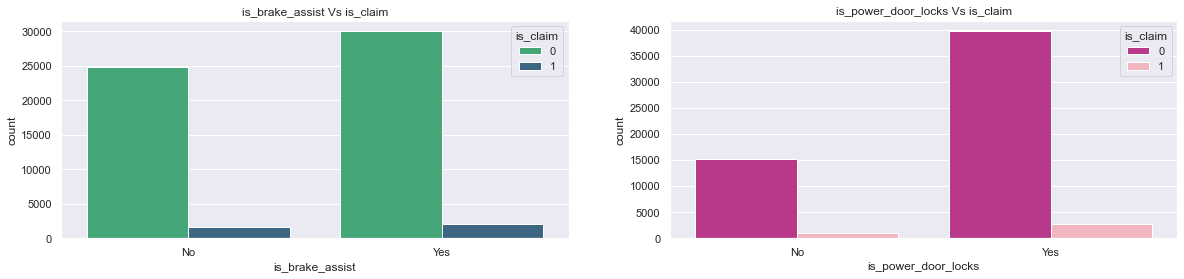

In [23]:
plt.figure(figsize=(20,4))
plt.subplot(121)
plt.title('is_brake_assist Vs is_claim')
sns.countplot(x='is_brake_assist',data=train,hue='is_claim', palette = 'viridis_r');
plt.subplot(122)
plt.title('is_power_door_locks Vs is_claim')
sns.countplot(x='is_power_door_locks',data=train,hue='is_claim', palette = 'RdPu_r');

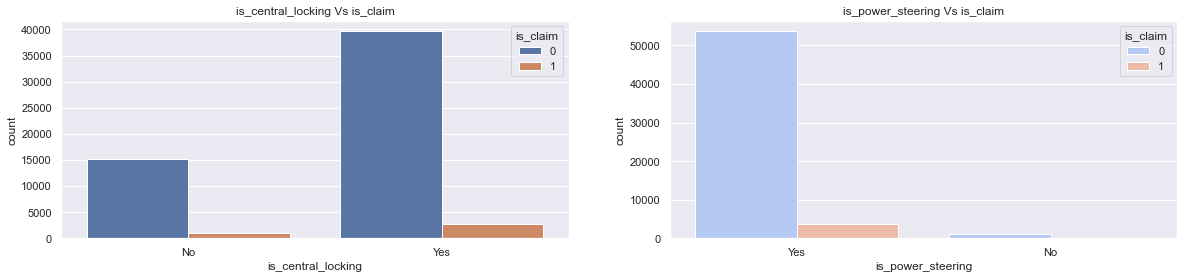

In [24]:
plt.figure(figsize=(20,4))
plt.subplot(121)
plt.title('is_central_locking Vs is_claim')
sns.countplot(x='is_central_locking',data=train,hue='is_claim');
plt.subplot(122)
plt.title('is_power_steering Vs is_claim')
sns.countplot(x='is_power_steering',data=train,hue='is_claim', palette = 'coolwarm');

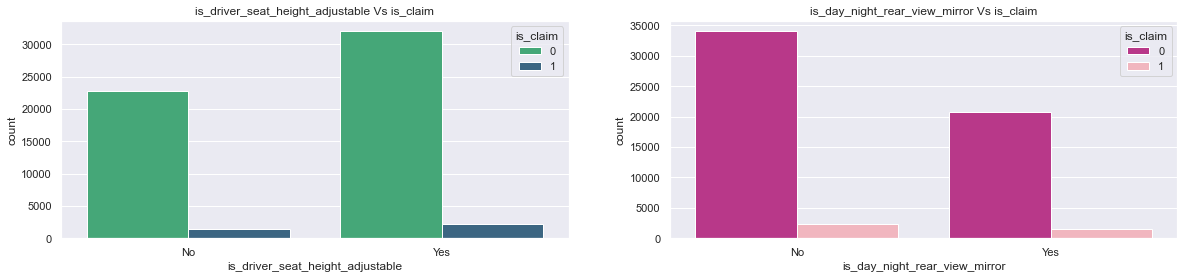

In [25]:
plt.figure(figsize=(20,4))
plt.subplot(121)
plt.title('is_driver_seat_height_adjustable Vs is_claim')
sns.countplot(x='is_driver_seat_height_adjustable',data=train,hue='is_claim', palette = 'viridis_r');
plt.subplot(122)
plt.title('is_day_night_rear_view_mirror Vs is_claim')
sns.countplot(x='is_day_night_rear_view_mirror',data=train,hue='is_claim', palette = 'RdPu_r');

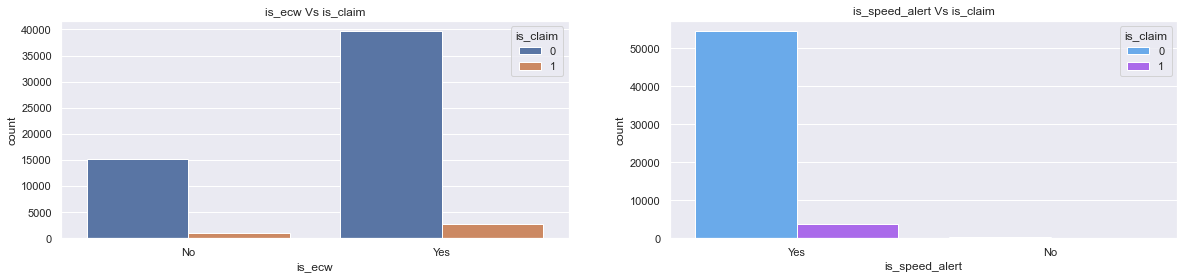

In [26]:
plt.figure(figsize=(20,4))
plt.subplot(121)
plt.title('is_ecw Vs is_claim')
sns.countplot(x='is_ecw',data=train,hue='is_claim');
plt.subplot(122)
plt.title('is_speed_alert Vs is_claim')
sns.countplot(x='is_speed_alert',data=train,hue='is_claim', palette = 'cool');

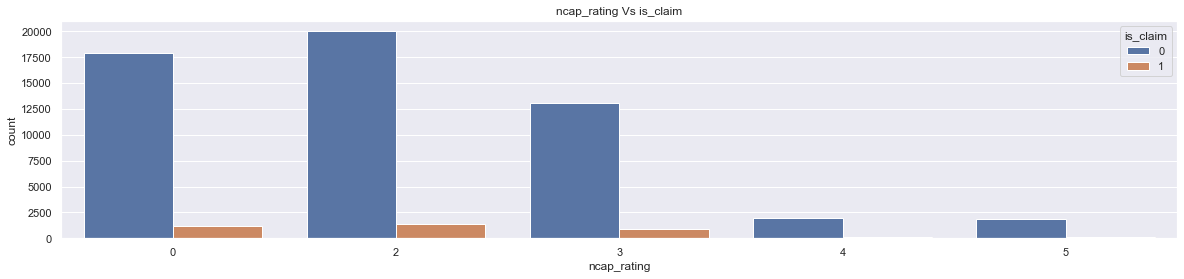

In [27]:
plt.figure(figsize=(20,4))
plt.title('ncap_rating Vs is_claim')
sns.countplot(x='ncap_rating',data=train,hue='is_claim');

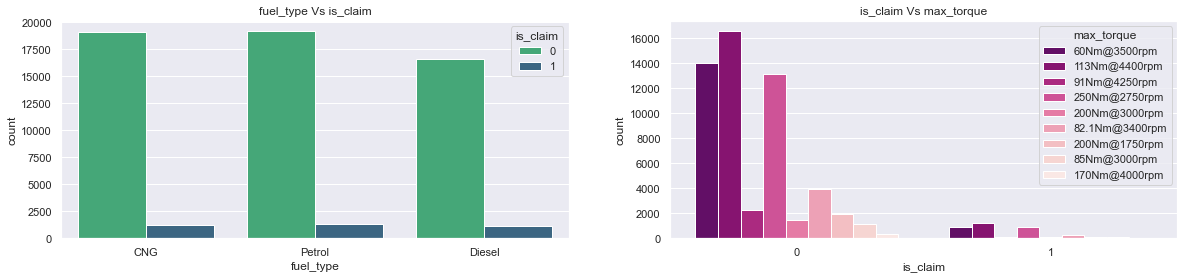

In [28]:
plt.figure(figsize=(20,4))
plt.subplot(121)
plt.title('fuel_type Vs is_claim')
sns.countplot(x='fuel_type',data=train,hue='is_claim', palette = 'viridis_r');
plt.subplot(122)
plt.title('is_claim Vs max_torque')
sns.countplot(x='is_claim',data=train,hue='max_torque', palette = 'RdPu_r');

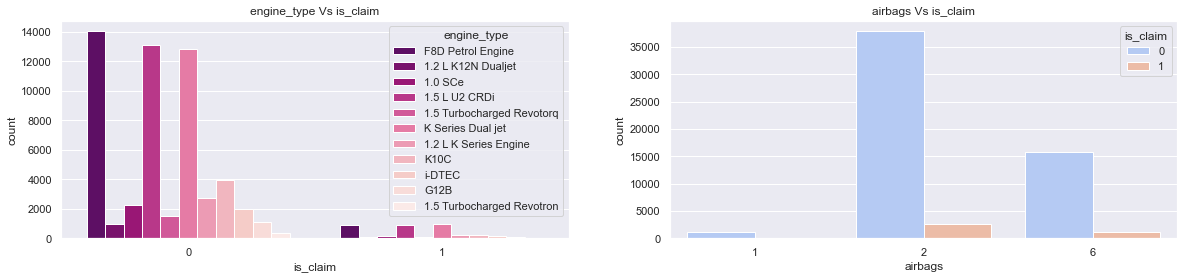

In [29]:
plt.figure(figsize=(20,4))
plt.subplot(121)
plt.title('engine_type Vs is_claim')
sns.countplot(x='is_claim',data=train,hue='engine_type', palette = 'RdPu_r');
plt.subplot(122)
plt.title('airbags Vs is_claim')
sns.countplot(x='airbags',data=train,hue='is_claim', palette = 'coolwarm');

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Preprocessing of Train DataSet</h2>
</div>

- Handling "area_cluster" Variable
- Handling "segment" Variable
- Handling "model" Variable
- Handling "fuel_type" Variable
- Handling "max_torque" Variable
- Handling "max_power" Variable
- Handling "engine_type" Variable
- Handling "is_esc" Variable
- Handling "is_adjustable_steering" Variable
- Handling "is_tpms" Variable
- Handling "is_parking_sensors" Variable
- Handling "is_parking_camera" Variable
- Handling "rear_brakes_type" Variable
- Handling "transmission_type" Variable
- Handling "steering_type" Variable
- Handling "is_front_fog_lights" Variable
- Handling "is_rear_window_wiper" Variable
- Handling "is_rear_window_washer" Variable
- Handling "is_rear_window_defogger" Variable
- Handling "is_brake_assist" Variable
- Handling "is_power_door_locks" Variable
- Handling "is_central_locking" Variable
- Handling "is_power_steering" Variable
- Handling "is_driver_seat_height_adjustable" Variable
- Handling "is_day_night_rear_view_mirror" Variable
- Handling "is_ecw" Variable
- Handling "is_speed_alert" Variable

In [30]:
#train['area_cluster'].value_counts()
train['area_cluster']=train['area_cluster'].map({'C8':8, 'C2':2, 'C5':5, 'C3':3,'C14':14, 'C13':13, 'C10':10, 'C9':9
                                                ,'C7':7, 'C12':12, 'C1':1, 'C11':11,'C19':19, 'C6':6, 'C15':15
                                                ,'C4':4, 'C17':17, 'C16':16, 'C21':21,'C18':18, 'C22':22, 'C20':20})
#print(train['area_cluster'])

In [31]:
#train['segment'].value_counts()
train['segment']=train['segment'].map({'B2':0, 'A':1, 'C2':2, 'B1':3, 'C1':4, 'Utility':5})
#print(train['segment'])

In [32]:
#train['model'].value_counts()
train['model']=train['model'].map({'M1':1, 'M4':4, 'M6':6, 'M8':8,'M7':7, 'M3':3, 'M9':9, 'M5':5
                                                ,'M10':10, 'M2':2, 'M11':11})
#print(train['model'])

In [33]:
#train['fuel_type'].value_counts()
train['fuel_type']=train['fuel_type'].map({'Petrol':0, 'CNG':1, 'Diesel':2})
#print(train['fuel_type'])

In [34]:
#train['max_torque'].value_counts()
train['max_torque']=train['max_torque'].map({'113Nm@4400rpm':0, '60Nm@3500rpm':1
                                             , '250Nm@2750rpm':2, '82.1Nm@3400rpm':3
                                             , '91Nm@4250rpm':4, '200Nm@1750rpm':5
                                            , '200Nm@3000rpm':6, '85Nm@3000rpm':7, '170Nm@4000rpm':8})
#print(train['max_torque'])

In [35]:
#train['max_power'].value_counts()
train['max_power']=train['max_power'].map({'88.50bhp@6000rpm':0, '40.36bhp@6000rpm':1
                                           , '113.45bhp@4000rpm':2, '55.92bhp@5300rpm':3
                                           ,'67.06bhp@5500rpm':4, '97.89bhp@3600rpm':5
                                           , '88.77bhp@4000rpm':6, '61.68bhp@6000rpm':7
                                           ,'118.36bhp@5500rpm':8})
#print(train['max_power'])

In [36]:
#train['engine_type'].value_counts()
train['engine_type']=train['engine_type'].map({'F8D Petrol Engine':0, '1.5 L U2 CRDi':1
                                           , 'K Series Dual jet':2, 'K10C':3
                                           ,'1.2 L K Series Engine':4, '1.0 SCe':5
                                           , 'i-DTEC':6, '1.5 Turbocharged Revotorq':7
                                           ,'G12B':8, '1.2 L K12N Dualjet':9, '1.5 Turbocharged Revotron':10})
#print(train['engine_type'])


In [37]:
#train['is_esc'].value_counts()
train['is_esc']=train['is_esc'].map({'No':0, 'Yes':1})
#print(train['is_esc'])

In [38]:
#train['is_adjustable_steering'].value_counts()
train['is_adjustable_steering']=train['is_adjustable_steering'].map({'No':0, 'Yes':1})
#print(train['is_adjustable_steering'])

In [39]:
#train['is_tpms'].value_counts()
train['is_tpms']=train['is_tpms'].map({'No':0, 'Yes':1})
#print(train['is_tpms'])

In [40]:
#train['is_parking_sensors'].value_counts()
train['is_parking_sensors']=train['is_parking_sensors'].map({'No':0, 'Yes':1})
#print(train['is_parking_sensors'])

In [41]:
#train['is_parking_camera'].value_counts()
train['is_parking_camera']=train['is_parking_camera'].map({'No':0, 'Yes':1})
#print(train['is_parking_camera'])

In [42]:
#train['rear_brakes_type'].value_counts()
train['rear_brakes_type']=train['rear_brakes_type'].map({'Drum':0, 'Disc':1})
#print(train['rear_brakes_type'])

In [43]:
#train['transmission_type'].value_counts()
train['transmission_type']=train['transmission_type'].map({'Manual':0, 'Automatic':1})
#print(train['transmission_type'])

In [44]:
#train['steering_type'].value_counts()
train['steering_type']=train['steering_type'].map({'Power':0, 'Electric':1, 'Manual':3})
#print(train['steering_type'])

In [45]:
#train['is_front_fog_lights'].value_counts()
train['is_front_fog_lights']=train['is_front_fog_lights'].map({'No':0, 'Yes':1})
#print(train['is_front_fog_lights'])

In [46]:
#train['is_rear_window_wiper'].value_counts()
train['is_rear_window_wiper']=train['is_rear_window_wiper'].map({'No':0, 'Yes':1})
#print(train['is_rear_window_wiper'])

In [47]:
#train['is_rear_window_washer'].value_counts()
train['is_rear_window_washer']=train['is_rear_window_washer'].map({'No':0, 'Yes':1})
#print(train['is_rear_window_washer'])

In [48]:
#train['is_rear_window_defogger'].value_counts()
train['is_rear_window_defogger']=train['is_rear_window_defogger'].map({'No':0, 'Yes':1})
#print(train['is_rear_window_defogger'])

In [49]:
#train['is_brake_assist'].value_counts()
train['is_brake_assist']=train['is_brake_assist'].map({'No':0, 'Yes':1})
#print(train['is_brake_assist'])

In [50]:
#train['is_power_door_locks'].value_counts()
train['is_power_door_locks']=train['is_power_door_locks'].map({'No':0, 'Yes':1})
#print(train['is_power_door_locks'])

In [51]:
#train['is_central_locking'].value_counts()
train['is_central_locking']=train['is_central_locking'].map({'No':0, 'Yes':1})
#print(train['is_central_locking'])

In [52]:
#train['is_power_steering'].value_counts()
train['is_power_steering']=train['is_power_steering'].map({'No':0, 'Yes':1})
#print(train['is_power_steering'])

In [53]:
#train['is_driver_seat_height_adjustable'].value_counts()
train['is_driver_seat_height_adjustable']=train['is_driver_seat_height_adjustable'].map({'No':0, 'Yes':1})
#print(train['is_driver_seat_height_adjustable'])

In [54]:
#train['is_day_night_rear_view_mirror'].value_counts()
train['is_day_night_rear_view_mirror']=train['is_day_night_rear_view_mirror'].map({'No':0, 'Yes':1})
#print(train['is_day_night_rear_view_mirror'])

In [55]:
#train['is_ecw'].value_counts()
train['is_ecw']=train['is_ecw'].map({'No':0, 'Yes':1})
#print(train['is_ecw'])

In [56]:
#train['is_speed_alert'].value_counts()
train['is_speed_alert']=train['is_speed_alert'].map({'No':0, 'Yes':1})
#print(train['is_speed_alert'])

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Preprocessing of Test DataSet</h2>
</div>

- Handling "area_cluster" Variable
- Handling "segment" Variable
- Handling "model" Variable
- Handling "fuel_type" Variable
- Handling "max_torque" Variable
- Handling "max_power" Variable
- Handling "engine_type" Variable
- Handling "is_esc" Variable
- Handling "is_adjustable_steering" Variable
- Handling "is_tpms" Variable
- Handling "is_parking_sensors" Variable
- Handling "is_parking_camera" Variable
- Handling "rear_brakes_type" Variable
- Handling "transmission_type" Variable
- Handling "steering_type" Variable
- Handling "is_front_fog_lights" Variable
- Handling "is_rear_window_wiper" Variable
- Handling "is_rear_window_washer" Variable
- Handling "is_rear_window_defogger" Variable
- Handling "is_brake_assist" Variable
- Handling "is_power_door_locks" Variable
- Handling "is_central_locking" Variable
- Handling "is_power_steering" Variable
- Handling "is_driver_seat_height_adjustable" Variable
- Handling "is_day_night_rear_view_mirror" Variable
- Handling "is_ecw" Variable
- Handling "is_speed_alert" Variable

In [57]:
#test['area_cluster'].value_counts()
test['area_cluster']=test['area_cluster'].map({'C8':8, 'C2':2, 'C5':5, 'C3':3,'C14':14, 'C13':13, 'C10':10, 'C9':9
                                                ,'C7':7, 'C12':12, 'C1':1, 'C11':11,'C19':19, 'C6':6, 'C15':15
                                                ,'C4':4, 'C17':17, 'C16':16, 'C21':21,'C18':18, 'C22':22, 'C20':20})
#print(test['area_cluster'])

In [58]:
#test['segment'].value_counts()
test['segment']=test['segment'].map({'B2':0, 'A':1, 'C2':2, 'B1':3, 'C1':4, 'Utility':5})
#print(test['segment'])

In [59]:
#test['model'].value_counts()
test['model']=test['model'].map({'M1':1, 'M4':4, 'M6':6, 'M8':8,'M7':7, 'M3':3, 'M9':9, 'M5':5
                                                ,'M10':10, 'M2':2, 'M11':11})
#print(test['model'])

In [60]:
#test['fuel_type'].value_counts()
test['fuel_type']=test['fuel_type'].map({'Petrol':0, 'CNG':1, 'Diesel':2})
#print(test['fuel_type'])

In [61]:
#test['max_torque'].value_counts()
test['max_torque']=test['max_torque'].map({'113Nm@4400rpm':0, '60Nm@3500rpm':1
                                             , '250Nm@2750rpm':2, '82.1Nm@3400rpm':3
                                             , '91Nm@4250rpm':4, '200Nm@1750rpm':5
                                            , '200Nm@3000rpm':6, '85Nm@3000rpm':7, '170Nm@4000rpm':8})
#print(test['max_torque'])

In [62]:
#test['max_power'].value_counts()
test['max_power']=test['max_power'].map({'88.50bhp@6000rpm':0, '40.36bhp@6000rpm':1
                                           , '113.45bhp@4000rpm':2, '55.92bhp@5300rpm':3
                                           ,'67.06bhp@5500rpm':4, '97.89bhp@3600rpm':5
                                           , '88.77bhp@4000rpm':6, '61.68bhp@6000rpm':7
                                           ,'118.36bhp@5500rpm':8})
#print(test['max_power'])

In [63]:
#test['engine_type'].value_counts()
test['engine_type']=test['engine_type'].map({'F8D Petrol Engine':0, '1.5 L U2 CRDi':1
                                           , 'K Series Dual jet':2, 'K10C':3
                                           ,'1.2 L K Series Engine':4, '1.0 SCe':5
                                           , 'i-DTEC':6, '1.5 Turbocharged Revotorq':7
                                           ,'G12B':8, '1.2 L K12N Dualjet':9, '1.5 Turbocharged Revotron':10})
#print(test['engine_type'])

In [64]:
#test['is_esc'].value_counts()
test['is_esc']=test['is_esc'].map({'No':0, 'Yes':1})
#print(test['is_esc'])

In [65]:
#test['is_adjustable_steering'].value_counts()
test['is_adjustable_steering']=test['is_adjustable_steering'].map({'No':0, 'Yes':1})
#print(test['is_adjustable_steering'])

In [66]:
#test['is_tpms'].value_counts()
test['is_tpms']=test['is_tpms'].map({'No':0, 'Yes':1})
#print(test['is_tpms'])

In [67]:
#test['is_parking_sensors'].value_counts()
test['is_parking_sensors']=test['is_parking_sensors'].map({'No':0, 'Yes':1})
#print(test['is_parking_sensors'])

In [68]:
#test['is_parking_camera'].value_counts()
test['is_parking_camera']=test['is_parking_camera'].map({'No':0, 'Yes':1})
#print(test['is_parking_camera'])

In [69]:
#test['rear_brakes_type'].value_counts()
test['rear_brakes_type']=test['rear_brakes_type'].map({'Drum':0, 'Disc':1})
#print(test['rear_brakes_type'])

In [70]:
#test['transmission_type'].value_counts()
test['transmission_type']=test['transmission_type'].map({'Manual':0, 'Automatic':1})
#print(test['transmission_type'])

In [71]:
#test['steering_type'].value_counts()
test['steering_type']=test['steering_type'].map({'Power':0, 'Electric':1, 'Manual':3})
#print(test['steering_type'])

In [72]:
#test['is_front_fog_lights'].value_counts()
test['is_front_fog_lights']=test['is_front_fog_lights'].map({'No':0, 'Yes':1})
#print(test['is_front_fog_lights'])

In [73]:
#test['is_rear_window_wiper'].value_counts()
test['is_rear_window_wiper']=test['is_rear_window_wiper'].map({'No':0, 'Yes':1})
#print(test['is_rear_window_wiper'])

In [74]:
#test['is_rear_window_washer'].value_counts()
test['is_rear_window_washer']=test['is_rear_window_washer'].map({'No':0, 'Yes':1})
#print(test['is_rear_window_washer'])

In [75]:
#test['is_rear_window_defogger'].value_counts()
test['is_rear_window_defogger']=test['is_rear_window_defogger'].map({'No':0, 'Yes':1})
#print(test['is_rear_window_defogger'])

In [76]:
#test['is_brake_assist'].value_counts()
test['is_brake_assist']=test['is_brake_assist'].map({'No':0, 'Yes':1})
#print(test['is_brake_assist'])

In [77]:
#test['is_power_door_locks'].value_counts()
test['is_power_door_locks']=test['is_power_door_locks'].map({'No':0, 'Yes':1})
#print(test['is_power_door_locks'])

In [78]:
#test['is_central_locking'].value_counts()
test['is_central_locking']=test['is_central_locking'].map({'No':0, 'Yes':1})
#print(test['is_central_locking'])

In [79]:
#test['is_power_steering'].value_counts()
test['is_power_steering']=test['is_power_steering'].map({'No':0, 'Yes':1})
#print(test['is_power_steering'])

In [80]:
#test['is_driver_seat_height_adjustable'].value_counts()
test['is_driver_seat_height_adjustable']=test['is_driver_seat_height_adjustable'].map({'No':0, 'Yes':1})
#print(test['is_driver_seat_height_adjustable'])

In [81]:
#test['is_day_night_rear_view_mirror'].value_counts()
test['is_day_night_rear_view_mirror']=test['is_day_night_rear_view_mirror'].map({'No':0, 'Yes':1})
#print(test['is_day_night_rear_view_mirror'])

In [82]:
#test['is_ecw'].value_counts()
test['is_ecw']=test['is_ecw'].map({'No':0, 'Yes':1})
#print(test['is_ecw'])

In [83]:
#test['is_speed_alert'].value_counts()
test['is_speed_alert']=test['is_speed_alert'].map({'No':0, 'Yes':1})
#print(test['is_speed_alert'])

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Visualization(Post Processing)</h2>
</div>

- Understand more about "Train" Data


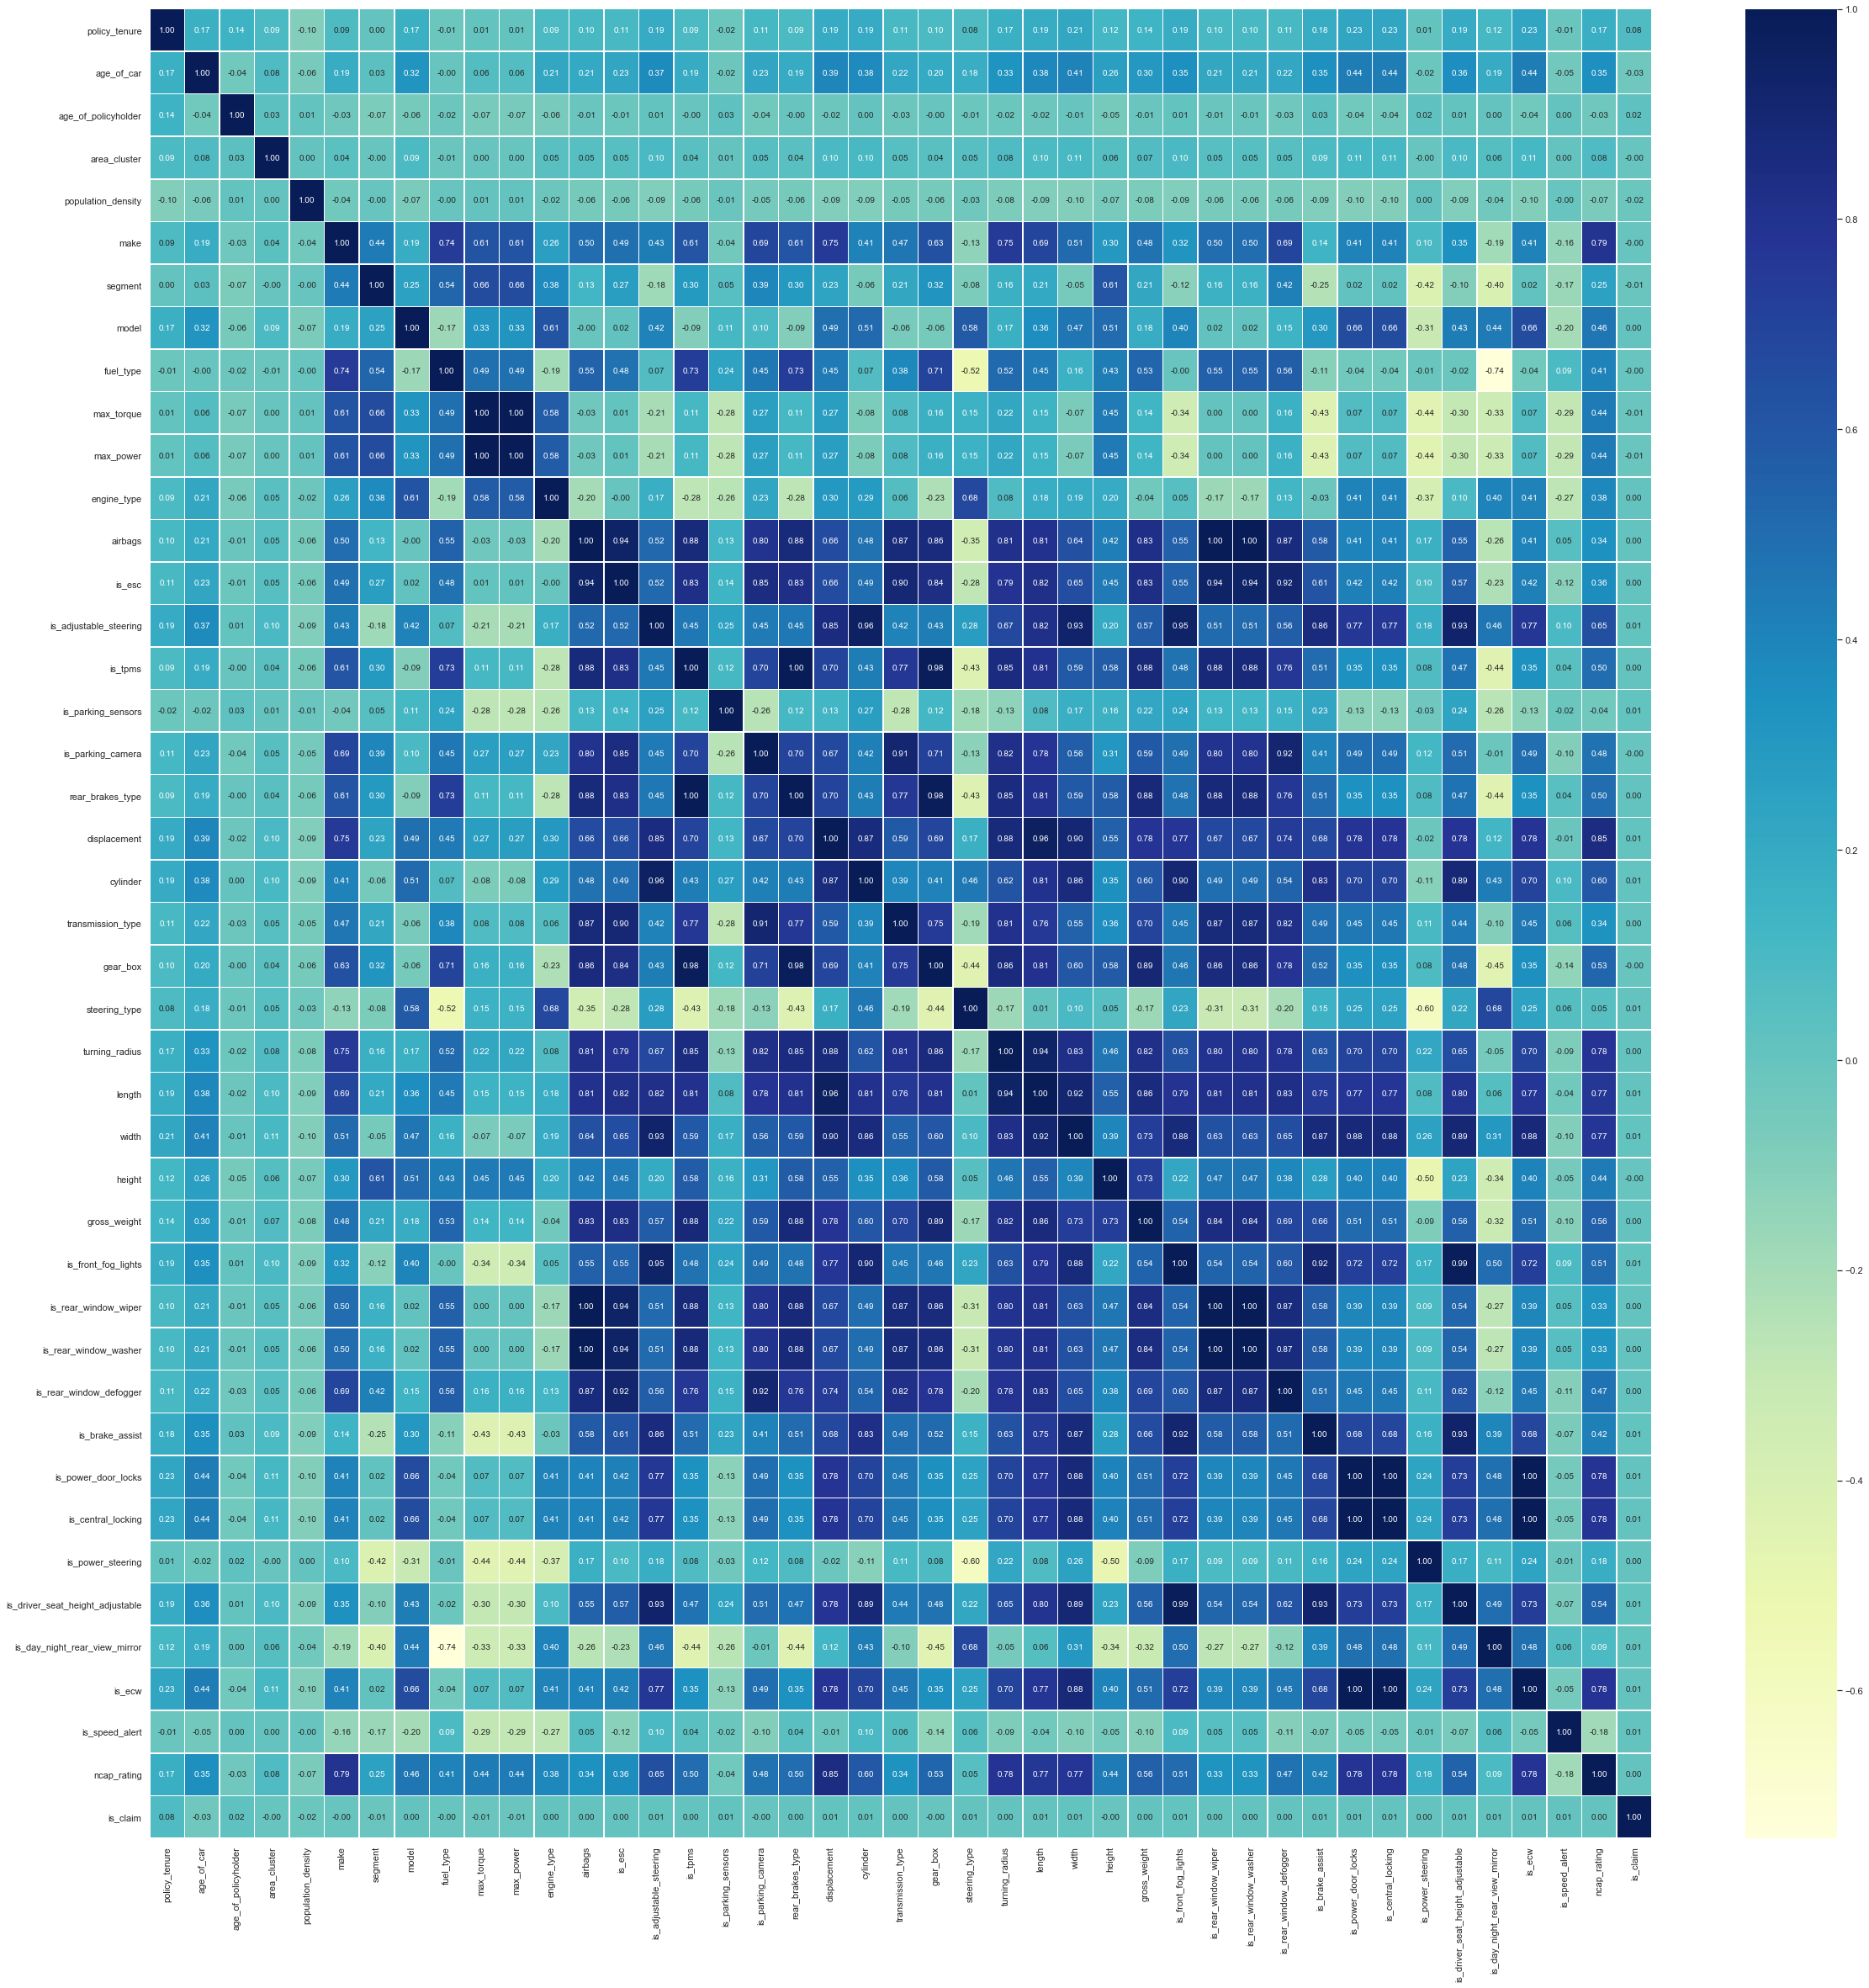

In [84]:
fig , ax = plt.subplots(figsize=(60,60))
sns.heatmap(train.corr(),annot = True,fmt='.2f',cmap='YlGnBu',linewidth=0.5);

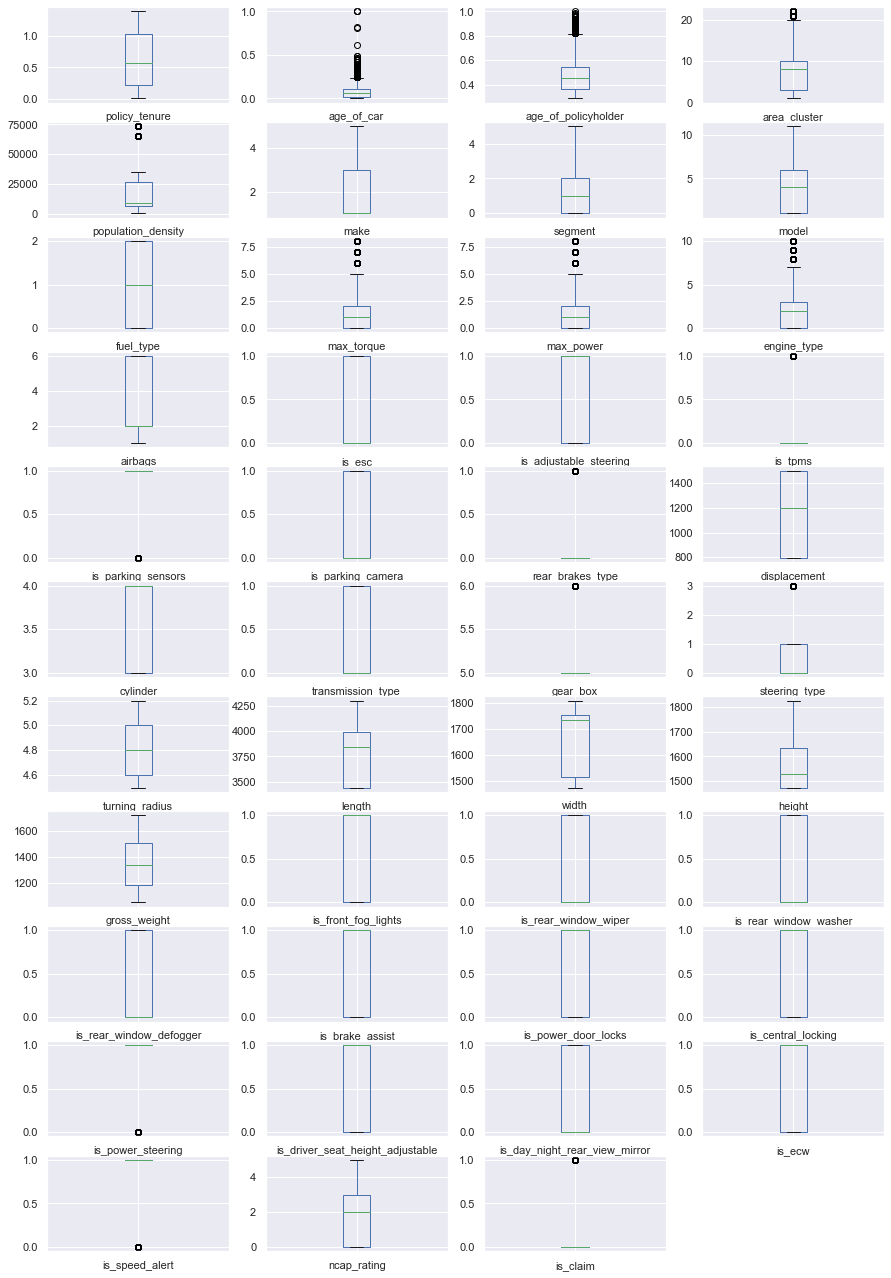

In [85]:
train.plot(kind="box",subplots=True,layout=(12,4),figsize=(15,25));

In [86]:
# Pair Plots to know the relation between different features
# ax = sns.pairplot(train)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in Train DataSet</h2>
</div>


In [87]:
train.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in Test DataSet</h2>
</div>


In [88]:
test.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Drop Irrelevant Columns from Train and Test DataSet</h2>
</div>


In [89]:
train = train.drop(['policy_id','population_density','is_tpms','is_parking_sensors','is_parking_camera'
                   , 'rear_brakes_type', 'transmission_type','is_rear_window_wiper'
                   , 'is_rear_window_washer', 'is_rear_window_defogger', 'is_power_steering'
                   , 'is_speed_alert','area_cluster','make','fuel_type','gear_box'
                   ,'turning_radius', 'length', 'width'],axis=1)
print(train.head())
print('-------------'*9)

test = test.drop(['policy_id','population_density','is_tpms','is_parking_sensors','is_parking_camera'
                   , 'rear_brakes_type', 'transmission_type','is_rear_window_wiper'
                   , 'is_rear_window_washer', 'is_rear_window_defogger', 'is_power_steering'
                   , 'is_speed_alert','area_cluster','make','fuel_type','gear_box'
                   ,'turning_radius', 'length', 'width'],axis=1)
print(test.head())
print('-------------'*9)

   policy_tenure  age_of_car  age_of_policyholder  segment  model  max_torque  \
0       0.515874        0.05             0.644231        1      1           1   
1       0.672619        0.02             0.375000        1      1           1   
2       0.841110        0.02             0.384615        1      1           1   
3       0.900277        0.11             0.432692        4      2           0   
4       0.596403        0.11             0.634615        1      3           4   

   max_power  engine_type  airbags  is_esc  ...  gross_weight  \
0          1            0        2       0  ...          1185   
1          1            0        2       0  ...          1185   
2          1            0        2       0  ...          1185   
3          0            9        2       1  ...          1335   
4          4            5        2       0  ...          1155   

   is_front_fog_lights  is_brake_assist  is_power_door_locks  \
0                    0                0                   

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Datatypes in Train and Test DataSet</h2>
</div>


In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   segment                           58592 non-null  int64  
 4   model                             58592 non-null  int64  
 5   max_torque                        58592 non-null  int64  
 6   max_power                         58592 non-null  int64  
 7   engine_type                       58592 non-null  int64  
 8   airbags                           58592 non-null  int64  
 9   is_esc                            58592 non-null  int64  
 10  is_adjustable_steering            58592 non-null  int64  
 11  displacement                      58592 non-null  int64  
 12  cyli

In [91]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     39063 non-null  float64
 1   age_of_car                        39063 non-null  float64
 2   age_of_policyholder               39063 non-null  float64
 3   segment                           39063 non-null  int64  
 4   model                             39063 non-null  int64  
 5   max_torque                        39063 non-null  int64  
 6   max_power                         39063 non-null  int64  
 7   engine_type                       39063 non-null  int64  
 8   airbags                           39063 non-null  int64  
 9   is_esc                            39063 non-null  int64  
 10  is_adjustable_steering            39063 non-null  int64  
 11  displacement                      39063 non-null  int64  
 12  cyli

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Preprocessing and Model Building</h2>
</div>

In [92]:
train_temp,test_temp=train_test_split(train,test_size=0.01,random_state=0)
print("Length of Original Data:-",len(train),"\nLength of Train Data:-",len(train_temp)
      ,"\nLength of Test Data:-",len(test_temp))

features=list(train.columns)
label='is_claim'

features.remove(label)

print('-------------'*9)
print("\nFEATURES ARE:-",features)

print('-------------'*9)
print("\nLABELS ARE:-",label)

print('-------------'*9)

X_train=train_temp[features]
y_train=train_temp[label]

X_test=test_temp[features]
y_test=test_temp[label]

Length of Original Data:- 58592 
Length of Train Data:- 58006 
Length of Test Data:- 586
---------------------------------------------------------------------------------------------------------------------

FEATURES ARE:- ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'segment', 'model', 'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'displacement', 'cylinder', 'steering_type', 'height', 'gross_weight', 'is_front_fog_lights', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'ncap_rating']
---------------------------------------------------------------------------------------------------------------------

LABELS ARE:- is_claim
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 1-  Random Forest Classifier</h2>
</div>

In [93]:
model1 = RandomForestClassifier(random_state = 42, class_weight='balanced')
model1.fit(X_train,y_train) 
print('Accuracy of Random Forest Classifier on training set: {:.2f}'
     .format(model1.score(X_train, y_train)))

print('Accuracy of Random Forest Classifier on test set: {:.2f}'
     .format(model1.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model1.predict(X_test)),'\n')

Accuracy of Random Forest Classifier on training set: 1.00
Accuracy of Random Forest Classifier on test set: 0.92
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.93      0.99      0.96       546
           1       0.14      0.03      0.04        40

    accuracy                           0.92       586
   macro avg       0.54      0.51      0.50       586
weighted avg       0.88      0.92      0.90       586
 



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 2-  KNeighbors Classifier</h2>
</div>

In [94]:
model2 = KNeighborsClassifier(n_jobs= -1)
model2.fit(X_train,y_train) 
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'
     .format(model2.score(X_train, y_train)))

print('Accuracy of KNeighbors Classifier on test set: {:.2f}'
     .format(model2.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model2.predict(X_test)),'\n')

Accuracy of KNeighbors Classifier on training set: 0.94
Accuracy of KNeighbors Classifier on test set: 0.93
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.93      1.00      0.97       546
           1       1.00      0.03      0.05        40

    accuracy                           0.93       586
   macro avg       0.97      0.51      0.51       586
weighted avg       0.94      0.93      0.90       586
 



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 3-  XGB Classifier</h2>
</div>

In [95]:
model3 = XGBClassifier(random_state=42)

model3.fit(X_train,y_train) 
print('Accuracy of XGB Classifier on training set: {:.2f}'
     .format(model3.score(X_train, y_train)))

print('Accuracy of XGB Classifier on test set: {:.2f}'
     .format(model3.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model3.predict(X_test)),'\n')

Accuracy of XGB Classifier on training set: 0.94
Accuracy of XGB Classifier on test set: 0.93
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.93      1.00      0.96       546
           1       0.00      0.00      0.00        40

    accuracy                           0.93       586
   macro avg       0.47      0.50      0.48       586
weighted avg       0.87      0.93      0.90       586
 



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Predict Target Variable using Tuned Model</h2>
</div>

In [98]:
# Import Test data for the prediction of the Target Variable
x = np.array(test)

# Prediction using Model 1
y_pred1 = model1.predict_proba(x) 
# Prediction using Model 2
y_pred2 = model2.predict_proba(x) 
# Prediction using Model 3
y_pred3 = model3.predict_proba(x) 

# Final Prediction using Ensemble Technique
predictions = list()
cb_weight=0.50 
lb_weight=0.49 
mb_weight=0.01

for i, j, k in zip(y_pred1, y_pred3,y_pred2):
    xx = [(cb_weight * i[0]) + (lb_weight * j[0]) + (mb_weight * k[0]),
          (cb_weight * i[1]) + (lb_weight * j[1]) + (mb_weight * k[1])]
    predictions.append(xx)

preds_ensemble=np.argmax(predictions,axis=1)

y_pred = preds_ensemble
print("Result of Ensemble Technique used for Submission")

Result of Ensemble Technique used for Submission


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Prepare Submission File in required format</h2>
</div>

In [99]:
df1=pd.DataFrame(y_pred,columns=['is_claim'])
submission1 = submission.drop(['is_claim'], axis=1)
final_pred = pd.concat([submission1,df1], axis=1) 
final_pred.to_csv(r'C:\Users\abarphe\Favorites\AV\Dataverse\Best_Final_Submission_Aniiket_Barphe.csv',index=False)
print("Process Completed")

Process Completed


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Summary</h2>
</div>

**Best Submission Score:**

**1) Public Leaderboard :-** 0.1496102590

**2) Private Leaderboard :-** 0.1476913590

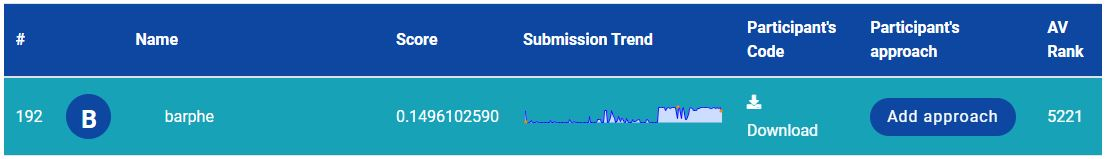

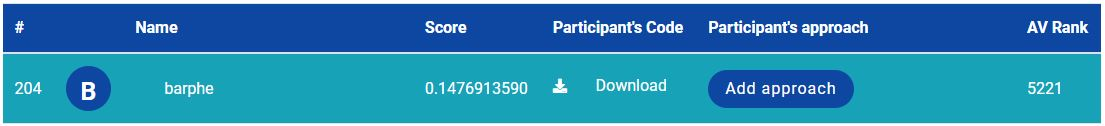

Competition Link: https://datahack.analyticsvidhya.com/contest/dataverse/True/#LeaderBoard

Rank Scored: **204** out of **2229** registered participants